# Decision Tree

The decision tree is a widely used model for classification and regression problems.

In scikit-learn, decision trees are implemented as **`DecisionTreeRegressor`** and **`DecisionTreeClassifier`**.  
Scikit-learn supports only **`pre-pruning`** (also known as early stopping) for decision trees.


In [150]:
### import libs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

---
# Iris
- Load the iris dataset provided by sklearn.
- Understand this dataset has categorical target not numerical
- Split the data into training and testing sets.

### import data, tree module, and fit

In [151]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [152]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### check score

In [153]:
print("Accuracy on the training subset: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.895


### Solving Overfitting

- You can prevent overfitting by specifying one of the following hyperparameters: `max_depth`, `max_leaf_nodes`, or `min_samples_leaf`.
- Setting these parameters helps to control the complexity of the decision tree model.

[for more info, read doc](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Accuracy on the training subset: 0.705 test subset: 0.553
Accuracy on the training subset: 0.964 test subset: 0.921
Accuracy on the training subset: 0.964 test subset: 0.921
Accuracy on the training subset: 0.991 test subset: 0.921
Accuracy on the training subset: 1.000 test subset: 0.921
Accuracy on the training subset: 1.000 test subset: 0.921
Accuracy on the training subset: 1.000 test subset: 0.921
Accuracy on the training subset: 1.000 test subset: 0.921
Accuracy on the training subset: 1.000 test subset: 0.921


Text(0, 0.5, 'tree-score')

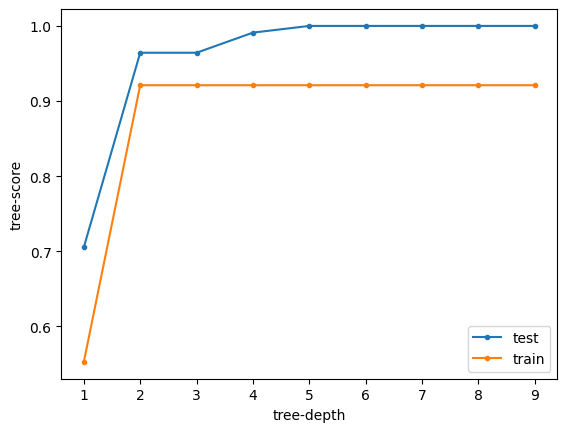

In [154]:
test_scores = list()
train_scores = list()
rand_num = 142342
for i in range(1, 10):
    tree = DecisionTreeClassifier(max_depth=i, random_state=rand_num)
    tree.fit(X_train, y_train)
    train_score = tree.score(X_train, y_train)
    test_score = tree.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(
        "Accuracy on the training subset: {:.3f} test subset: {:.3f}".format(
            train_score, test_score
        )
    )

plt.plot(range(1, 10), train_scores, ".-")
plt.plot(range(1, 10), test_scores, ".-")
plt.legend(["test", "train"])
plt.xlabel("tree-depth")
plt.ylabel("tree-score")

### Decision Tree visualiztion


In [155]:
tree = DecisionTreeClassifier(max_depth=5, random_state=rand_num)

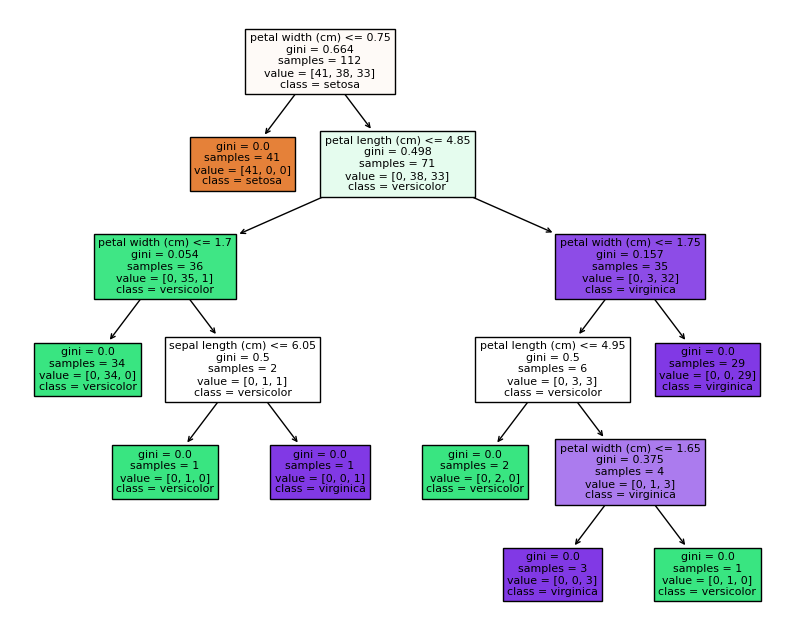

In [156]:
from sklearn.tree import plot_tree

clf = tree.fit(X_train, y_train)
plt.figure(figsize=(10, 8))
plot_tree(
    clf,
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    filled=True,
)
plt.show()

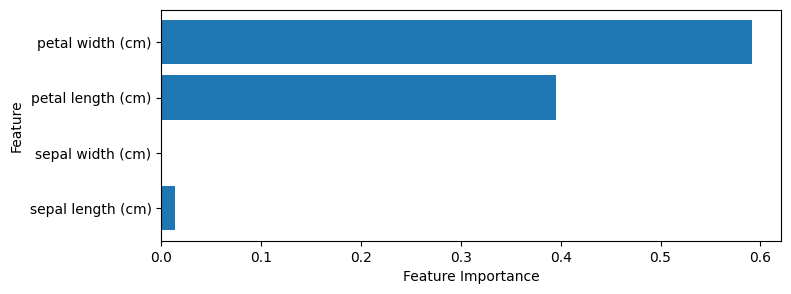

In [157]:
n_features = iris.data.shape[1]
plt.figure(figsize=(8, 3))
plt.barh(range(n_features), tree.feature_importances_, align="center")
plt.yticks(np.arange(n_features), iris.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

---
# Breast Cancer

### Creating the Decision Tree Model

- Create a DecisionTreeClassifier for classification.
- Evaluate the model on both the training and testing datasets.

In [158]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target
)

Accuracy on the training subset: 0.934 test subset: 0.874
Accuracy on the training subset: 0.967 test subset: 0.909
Accuracy on the training subset: 0.981 test subset: 0.916
Accuracy on the training subset: 0.988 test subset: 0.916
Accuracy on the training subset: 0.993 test subset: 0.916
Accuracy on the training subset: 0.995 test subset: 0.902
Accuracy on the training subset: 0.998 test subset: 0.909
Accuracy on the training subset: 1.000 test subset: 0.909
Accuracy on the training subset: 1.000 test subset: 0.909


Text(0, 0.5, 'tree-score')

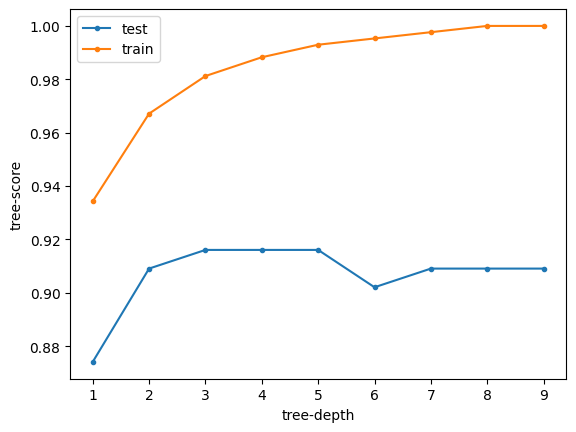

In [159]:
test_scores = list()
train_scores = list()
for i in range(1, 10):
    tree = DecisionTreeClassifier(max_depth=i, random_state=5)
    tree.fit(X_train, y_train)
    train_score = tree.score(X_train, y_train)
    test_score = tree.score(X_test, y_test)
    test_scores.append(test_score)
    train_scores.append(train_score)
    print(
        "Accuracy on the training subset: {:.3f} test subset: {:.3f}".format(
            train_score, test_score
        )
    )

plt.plot(range(1, 10), test_scores, ".-")
plt.plot(range(1, 10), train_scores, ".-")
plt.legend(["test", "train"])
plt.xlabel("tree-depth")
plt.ylabel("tree-score")

In [160]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

print("Accuracy on the training subset: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.988
Accuracy on the test subset: 0.909


### Decision Tree visualiztion


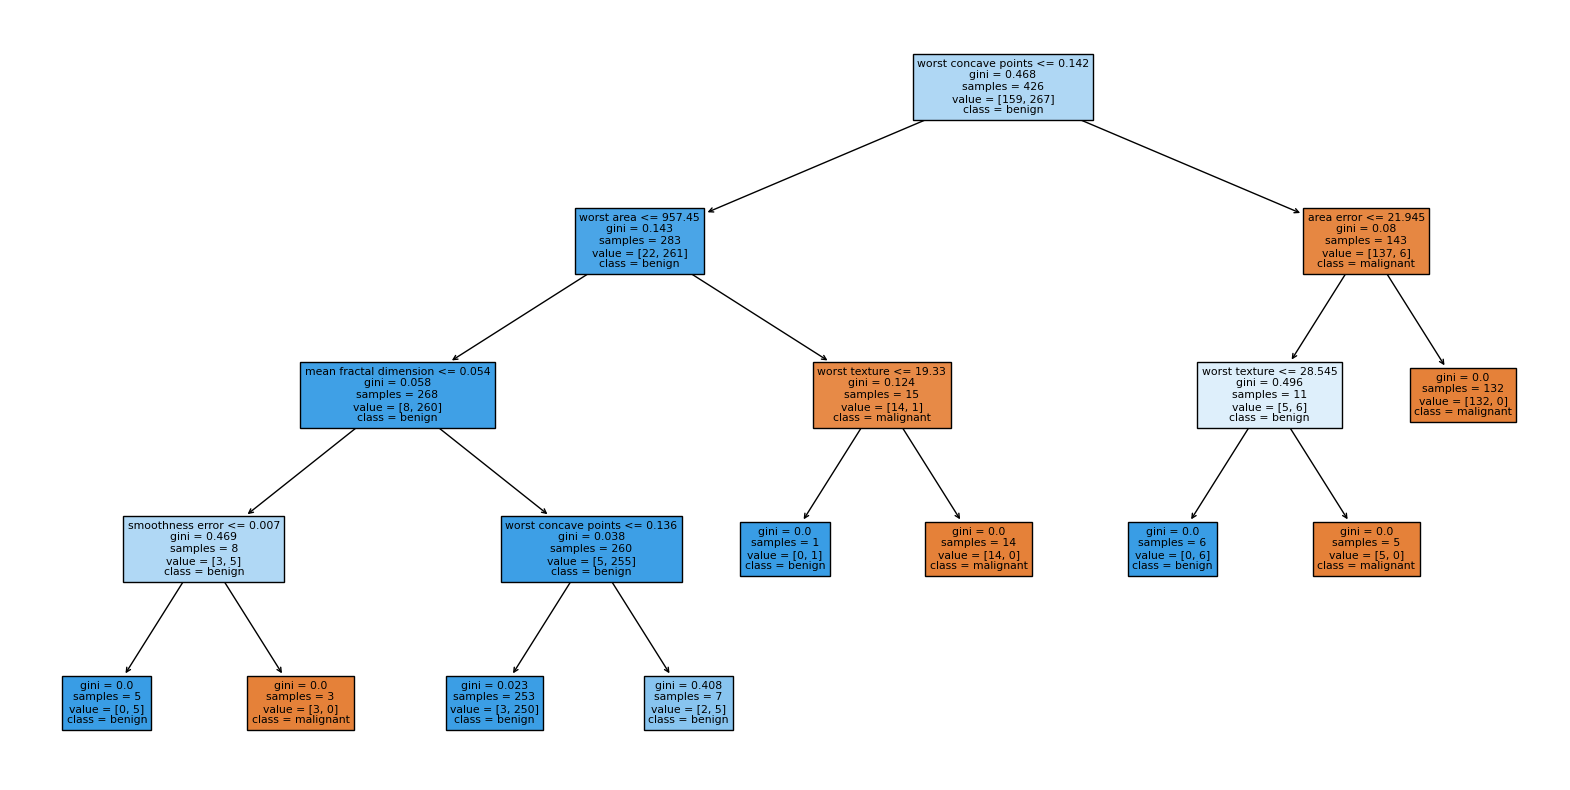

In [161]:
from sklearn.tree import plot_tree

clf = tree.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    class_names=["malignant", "benign"],
    feature_names=cancer.feature_names,
    filled=True,
)
plt.show()

### feature_importances


In [162]:
print("Feature Importances:\n{}".format(tree.feature_importances_))

Feature Importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01031207 0.         0.
 0.         0.03171234 0.01968257 0.         0.         0.
 0.         0.         0.         0.03842675 0.         0.1217194
 0.         0.         0.         0.77814686 0.         0.        ]


### feature_importances visualization


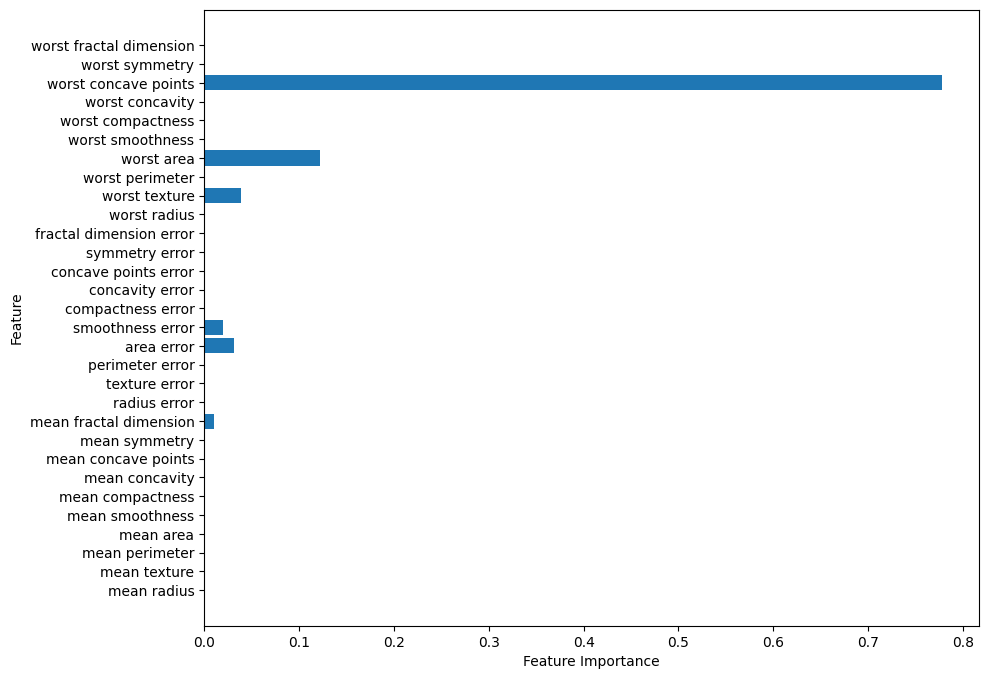

In [163]:
n_features = cancer.data.shape[1]
plt.figure(figsize=(10, 8))
plt.barh(range(n_features), tree.feature_importances_, align="center")
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

---
# Diabetes

In [164]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diab.data, diab.target)

In [165]:
tree = DecisionTreeClassifier(max_depth=50, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on the training subset: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.018


### why test score so low? how should we fix this

In [166]:
diab.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [167]:
import pandas as pd

cats = pd.qcut(diab.target, 4, labels=["a", "b", "c", "d"])
cats

['c', 'a', 'c', 'c', 'b', ..., 'c', 'b', 'b', 'd', 'a']
Length: 442
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(diab.data, cats)

In [170]:
tree = DecisionTreeClassifier(max_depth=25, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on the training subset: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.324
